<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<a id="setup"></a>
<h1><b><p style="background-image: Blue;font-family:tahoma;font-size:120%;color:blue;text-align:center;border-radius:15px 50px; padding:10px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Heart Prediction</p></b></h1>

## Create Data Dictionary

1- age : Age in years

2- sex : (1-male , 2-female)

3- cp : Chest pain type
> 0: Typical angina: chest pain related decrease blood supply to the heart

> 1: Atypical angina: chest pain not related to heart

> 2: Non-anginal pain: typically esophageal spasms (non heart related)

> 3: Asymptomatic: chest pain not showing signs of disease

4- trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5- chol : serum cholestrol in mg/dl
> serum = LDL + HDL + .2 * triglycerides

> above 200 is cause for concern

6- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> '>126' mg/dL signals diabetes

7- restecg : resting electrocardiographic results
> 0: Nothing to note

>1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat

>2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber.

8- thalach : maximum heart rate achieved

9- exang : exercise induced angina (1 = yes; 0 = no)

10- oldpeak : ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11- slope : the slope of the peak exercise ST segment

> 0: Upsloping: better heart rate with excercise (uncommon)

>1: Flatsloping: minimal change (typical healthy heart)

>2: Downslopins: signs of unhealthy heart

12- ca - number of major vessels (0-3) colored by flourosopy
> colored vessel means the doctor can see the blood passing through

> the more blood movement the better (no clots)

13- thal : thalium stress result
> 1,3: normal
> 6: fixed defect: used to be defect but ok now
> 7: reversable defect: no proper blood movement when excercising

14- target : have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    526
0    499
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

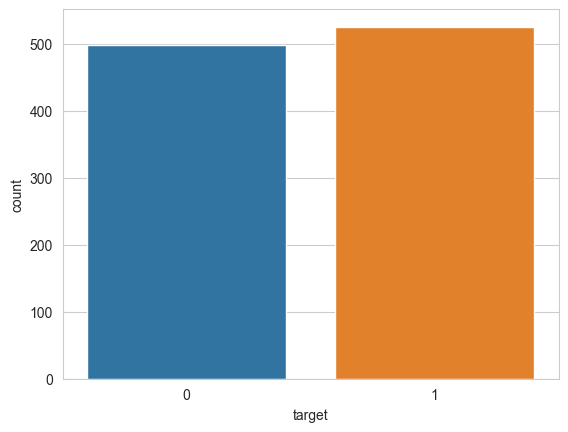

In [9]:
print(data.target.value_counts())
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data)

We have 165 persons with heart diseases and 138 not having heart disease.

In [10]:
categorical_variable = []
continuous_variable = []

for column in data.columns:
  if(len(data[column].unique())<=10):
    categorical_variable.append(column)
  else:
    continuous_variable.append(column)


In [11]:
categorical_variable

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
continuous_variable

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Working with model 1

In [13]:
dataset = data.copy()
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: >

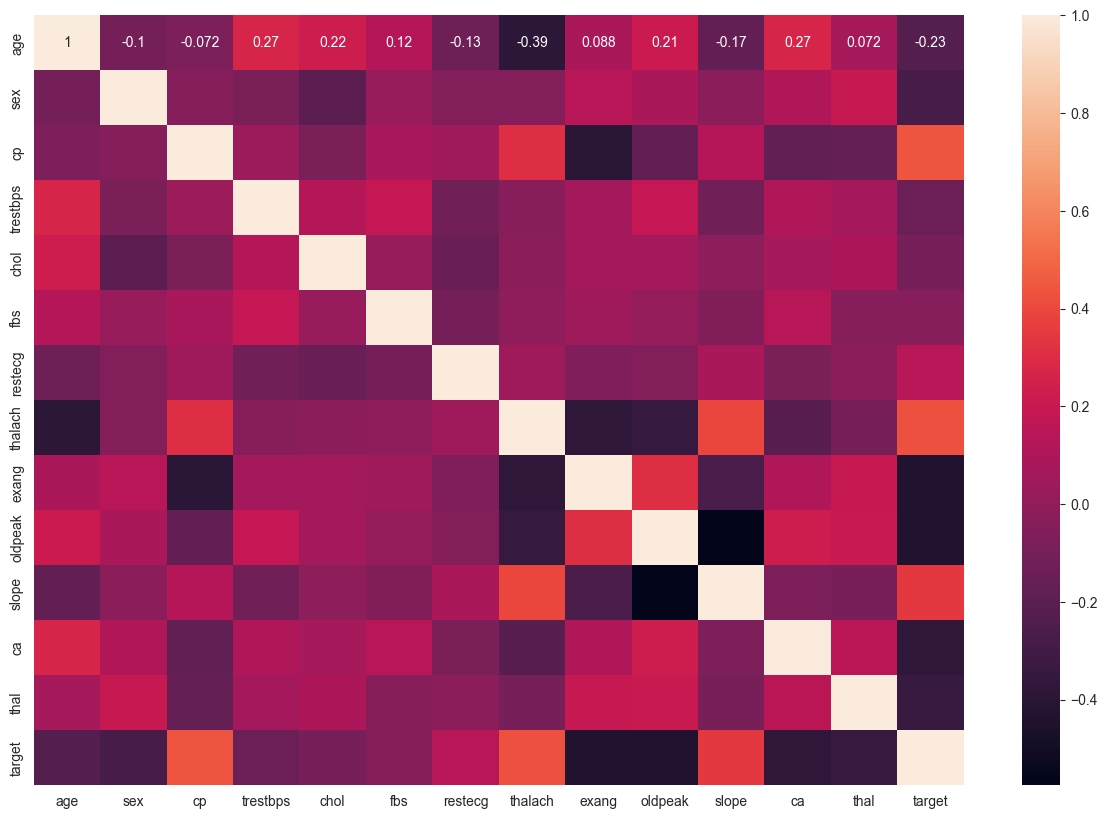

In [14]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [15]:
X = dataset.drop(columns='target',axis=1)
y = dataset['target']

In [38]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [39]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [16]:
print("Shape of dataset ",dataset.shape)
print("Shape of X ", X.shape)
print("Shape of Y ",y.shape)
print(X.columns)

Shape of dataset  (1025, 14)
Shape of X  (1025, 13)
Shape of Y  (1025,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier 

X_train,X_test ,y_train,y_test = tts(X,y,test_size=0.2,random_state = 42)
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(X_train,y_train)


RandomForestClassifier(n_estimators=20)

In [18]:
pred1 = model1.predict(X_test)
pred1[:10]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of model is {round(accuracy_score(y_test, pred1)*100, 2)}%")

Accuracy of model is 98.54%


## Hyperparameter Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier(n_jobs=-1)


In [22]:
from scipy.stats import randint
param_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,31),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,31),
              }

In [23]:
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 40, cv = 9)

In [24]:
search_clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C3DE38A90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C3DE39810>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [25]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 26, 'min_samples_leaf': 2, 'n_estimators': 300}
0.9609677761851674


In [26]:
claasifier=RandomForestClassifier( n_estimators=10,bootstrap= False,criterion='gini',max_depth=None,max_features=3,min_samples_leaf= 2)

In [27]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [28]:
pred2 = model1.predict(X_test)
confusion_matrix(y_test,pred2)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [29]:
print(f"Accuracy is {round(accuracy_score(y_test, model1.predict(X_test))*100,2)}%")

Accuracy is 98.54%


# LOC ROWS

In [41]:
dataset.loc[500:500:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
500,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


# Making a Predictive System

In [31]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = model1.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have a heart problem')
else:
    print('The person have a heart problem')

[1]
The person have a heart problem


# Saving the trained model

In [32]:
import pickle

In [34]:
filename = 'heart_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [35]:
# loading the saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))

In [36]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = model1.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have a heart problem')
else:
    print('The person have a heart problem')

[1]
The person have a heart problem


In [37]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>